### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_south_asian_languages_stanford_standards import south_asian_language_word_list_merged as word_list_ln_dict
MODEL_DIR = '../../word_embeddings/south_asian_ln_word_vectors/word_vectors/'


### load male, female & professional occupation wordlist

In [2]:
def remove_common_words_in_reference_group(group_1, group_2):
    group_1 = list(set(group_1))
    group_2 = list(set(group_2))
    for index_1, word_1 in enumerate(group_1):
        for index_2, word_2 in enumerate(group_2):
            if word_1 == word_2:
                group_1.pop(index_1)
                group_2.pop(index_2)
                break
    return group_1, group_2

def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = word_list_ln_dict[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = word_list_ln_dict['en']['pr_occupations']
    MALE_WORDS = word_list_ln_dict[lang]['male_words']
    FEMALE_WORDS = word_list_ln_dict[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    MALE_WORDS, FEMALE_WORDS = remove_common_words_in_reference_group(MALE_WORDS, FEMALE_WORDS)
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations


target group -->
professional_occupation ['चौकीदार', 'सांख्यिकीविद्', 'दाई', 'बेलीफ', 'नीलामकर्ता', 'फोटोग्राफर', 'भूविज्ञानी', 'शोमेकर', 'एथलीट', 'कैशियर', 'डांसर', 'हाउसकीपर', 'अकाउंटेंट', 'फिजिसिस्ट', 'माली', 'डेंटिस्ट', 'जुलाहा', 'लोहार', 'मनोवैज्ञानिक', 'सुपरवाइजर', 'गणितज्ञ', 'सर्वेक्षक', 'दर्जी', 'डिजाइनर', 'अर्थशास्त्री', 'मैकेनिक', 'मजदूर', 'पोस्टमास्टर', 'दलाल', 'केमिस्ट', 'लाइब्रेरियन', 'परिचर', 'लिपिक', 'संगीतकार', 'कुली', 'वैज्ञानिक', 'बढ़ई', 'नाविक', 'प्रशिक्षक', 'शेरिफ', 'पायलट', 'निरीक्षक', 'राजमिस्त्री', 'बेकर', 'एडमिनिस्ट्रेटर', 'आर्किटेक्ट', 'कलेक्टर', 'ऑपरेटर', 'सर्जन', 'ड्राइवर', 'पेंटर', 'कंडक्टर', 'नर्स', 'कुक', 'इंजीनियर', 'सेवानिवृत्त', 'बिक्री', 'वकील', 'पादरी', 'चिकित्सक', 'किसान', 'क्लर्क', 'प्रबंधक', 'रक्षक', 'कलाकार', 'स्मिथ', 'अधिकारी', 'पुलिस', 'चिकित्सक', 'प्रोफेसर', 'छात्र', 'जज', 'शिक्षक', 'लेखक', 'सचिव', 'सैनिक']




reference group -->
male ['अंकल', 'बेटे', 'पुरुष', 'लड़के', 'आदमी', 'बेटा', 'उसका', 'चाचा', 'भतीजे', 'भाई', 'वालिद', 'लड़का', 'पिता', '

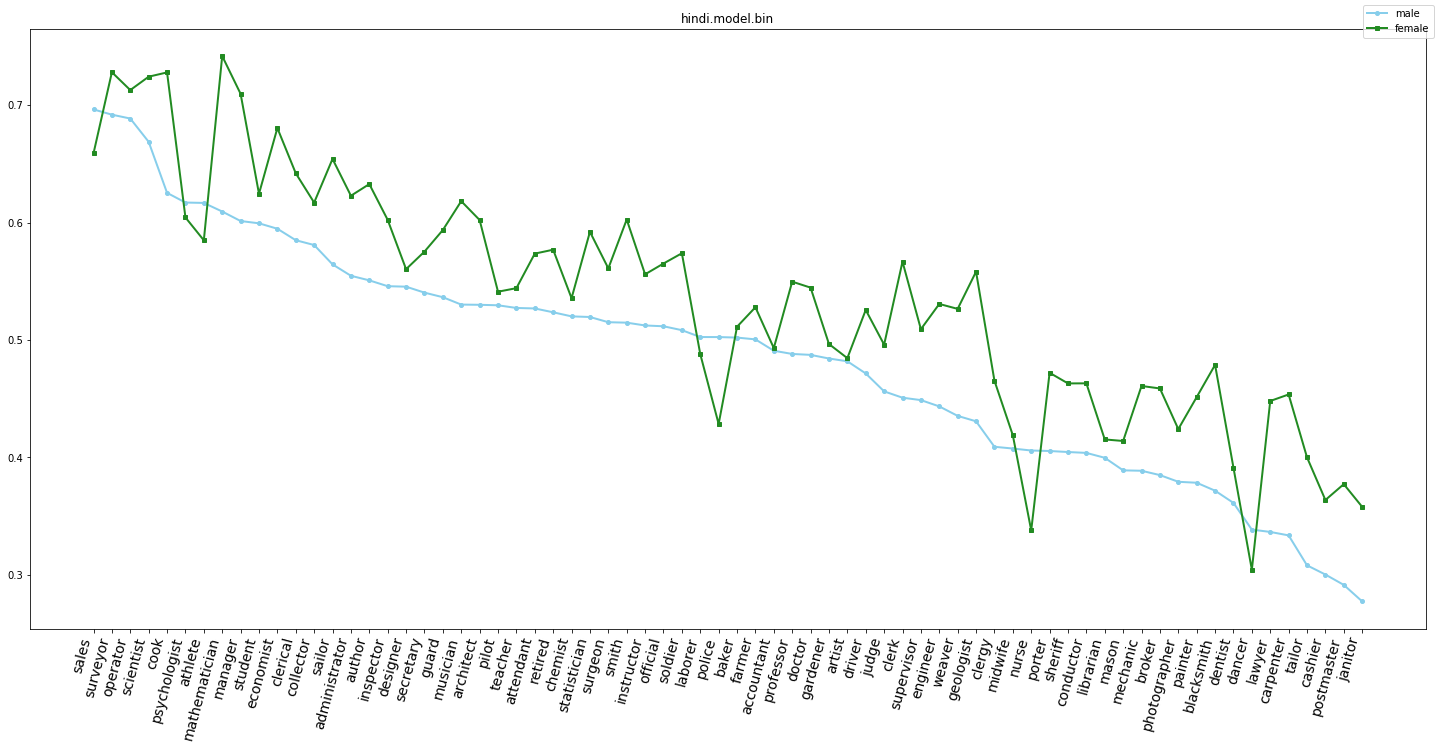

total 5 missing words for this embedding {'बेलीफ', 'शोमेकर', 'हाउसकीपर', 'फिजिसिस्ट', 'नीलामकर्ता'}



target group -->
professional_occupation ['चौकीदार', 'सांख्यिकीय', 'सुँडेनी', 'बेलिफ', 'लिलामी', 'फोटोग्राफर', 'भूविज्ञानी', 'जुत्ता निर्माता', 'खेलाडी', 'क्यासियर', 'नर्तक', 'हाउसकीपर', 'एकाउन्टेन्ट', 'भौतिक विज्ञ', 'माली', 'दंत चिकित्सक', 'जुलाहा', 'लोहार', 'मनोवैज्ञानिक', 'सुपरवाइजर', 'गणितज्ञ', 'सर्वेक्षणकर्ता', 'दर्जी', 'डिजाइनर', 'अर्थशास्त्री', 'मेकानिक', 'मजदूर', 'पोस्टमास्टर', 'दलाल', 'रसायन विज्ञ', 'लाइब्रेरियन', 'परिचर', 'लिपिक', 'संगीतकार', 'पोर्टर', 'वैज्ञानिक', 'बढ़ई', 'नाविक', 'प्रशिक्षक', 'शेरिफ', 'पायलट', 'इन्स्पेक्टर', 'मेसन', 'बेकर', 'प्रशासक', 'आर्किटेक्ट', 'कलेक्टर', 'अपरेटर', 'सर्जन', 'ड्राइभर', 'पेन्टर', 'कन्डक्टर', 'नर्स', 'कुक', 'इन्जिनियर', 'सेवानिवृत्त', 'बिक्री', 'वकिल', 'पादरीहरू', 'चिकित्सक', 'किसान', 'क्लर्क', 'म्यानेजर', 'गार्ड', 'कलाकार', 'स्मिथ', 'अफिसियल', 'पुलिस', 'चिकित्सक', 'प्राध्यापक', 'विद्यार्थी', 'न्यायाधीश', 'शिक्षक', 'लेखक', 'सचिव', 'सिपाही

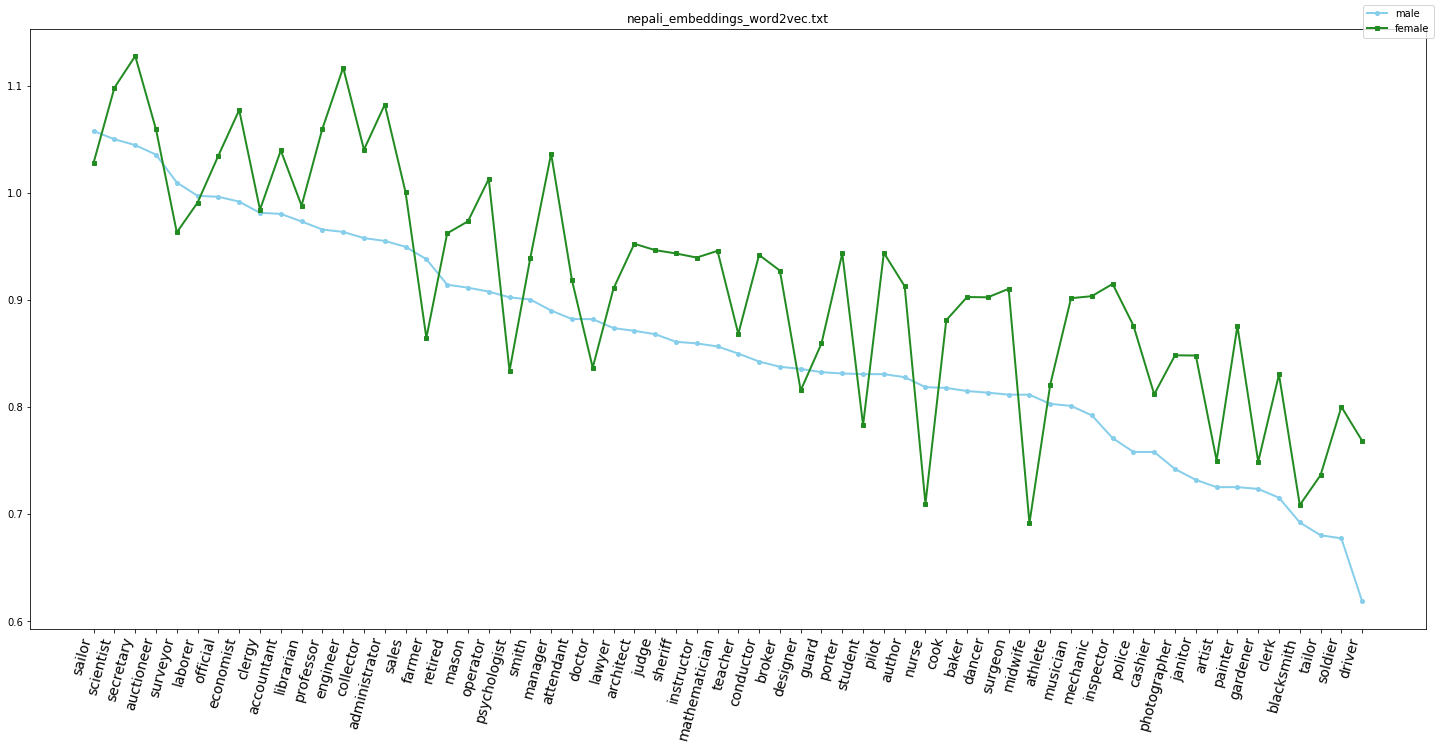

total 15 missing words for this embedding {'जुलाहा', 'बेलिफ', 'उसलाई', 'भूविज्ञानी', 'भौतिक विज्ञ', 'दंत चिकित्सक', 'रसायन विज्ञ', 'सांख्यिकीय', 'लिपिक', 'जुत्ता निर्माता', 'बढ़ई', 'भान्जीहरू', 'हाउसकीपर', 'सुपरवाइजर', 'पोस्टमास्टर'}



target group -->
professional_occupation ['দারোয়ান', 'পরিসংখ্যানবিদ', 'মিডওয়াইফ', 'বেলিফ', 'নিলাম', 'ফটোগ্রাফার', 'ভূতত্ত্ববিদ', 'জুতো প্রস্তুতকারক', 'অ্যাথলেট', 'ক্যাশিয়ার', 'নর্তকী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'উদ্যানবিদ', 'দাঁতের', 'তাঁতি', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'যান্ত্রিক', 'শ্রমিক', 'পোস্টমাস্টার', 'ব্রোকার', 'রসায়নবিদ', 'গ্রন্থাগারিক', 'পরিচারক', 'কেরানি', 'সুরকার', 'কুলি', 'বিজ্ঞানী', 'ছুতার', 'নাবিক', 'প্রশিক্ষক', 'শেরিফ', 'পাইলট', 'পরিদর্শক', 'রাজমিস্ত্রি', 'বেকার', 'প্রশাসক', 'স্থপতি', 'সংগ্রাহক', 'অপারেটর', 'সার্জন', 'চালক', 'চিত্রশিল্পী', 'কন্ডাক্টর', 'নার্স', 'কুক', 'ইঞ্জিনিয়ার', 'অবসরপ্রাপ্ত', 'বিক্রয়', 'আইনজীবী', 'পাদ্রী', 'চিকিত্সক', 'কৃষক', 'ক

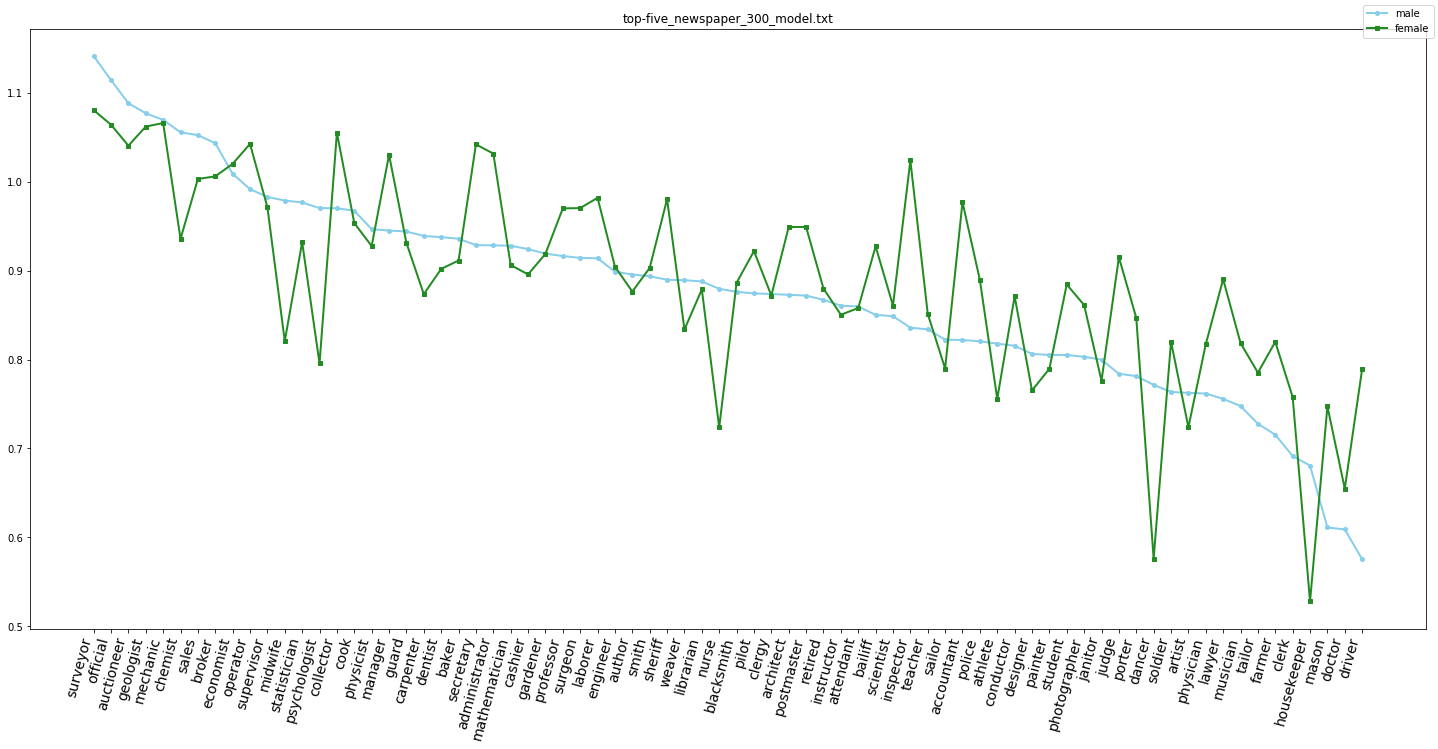

total 1 missing words for this embedding {'জুতো প্রস্তুতকারক'}



target group -->
professional_occupation ['جینیٹر', 'شماریات دان', 'دایہ', 'بیلف', 'نیلامی', 'فوٹوگرافر', 'ماہر ارضیات', 'جوتا بنانے والا', 'ایتھلیٹ', 'کیشئیر', 'ڈانسر', 'گھریلو ملازم', 'اکاؤنٹنٹ', 'طبیعیات دان', 'مالی', 'دانتوں کا ڈاکٹر', 'ویور', 'لوہار', 'ماہر نفسیات', 'سپروائزر', 'ریاضی دان', 'سرویئر', 'درزی', 'ڈیزائنر', 'ماہر معاشیات', 'مکینک', 'مزدور', 'پوسٹ ماسٹر', 'بروکر', 'کیمسٹ', 'لائبریرین', 'حاضر خدمت', 'مولوی', 'موسیقار', 'پورٹر', 'سائنسدان', 'بڑھئی', 'نااخت', 'انسٹرکٹر', 'شیرف', 'پائلٹ', 'انسپکٹر', 'میسن', 'بیکر', 'ایڈمنسٹریٹر', 'معمار', 'کلکٹر', 'آپریٹر', 'سرجن', 'ڈرائیور', 'پینٹر', 'کنڈیکٹر', 'نرس', 'کک', 'انجینئر', 'ریٹائرڈ', 'سیلز', 'وکیل', 'پادری', 'فزیشن', 'کسان', 'کلرک', 'منیجر', 'گارڈ', 'آرٹسٹ', 'سمتھ', 'آفیشل', 'پولیس', 'ڈاکٹر', 'پروفیسر', 'طالب علم', 'جج', 'اساتذہ', 'مصنف', 'سکریٹری', 'سپاہی']




reference group -->
male ['نر', 'ماموں', 'آدمی', 'بھتیجے', 'بھائی', 'وہ', 'بیٹا', 'لڑکے', 'بیٹے', 'مرد

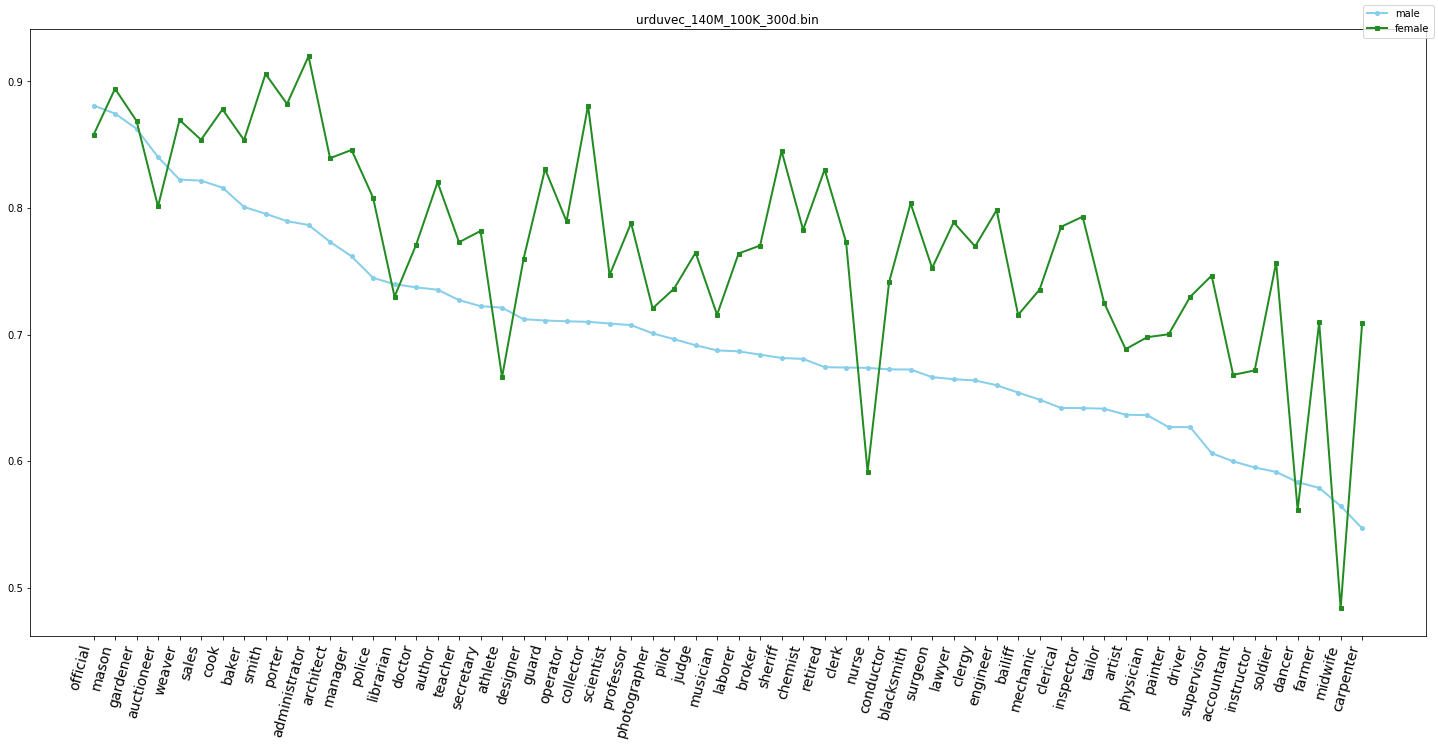

total 16 missing words for this embedding {'نااخت', 'ماہر نفسیات', 'سرویئر', 'جوتا بنانے والا', 'حاضر خدمت', 'ریاضی دان', 'طالب علم', 'ماہر ارضیات', 'گھریلو ملازم', 'دانتوں کا ڈاکٹر', 'پوسٹ ماسٹر', 'کیشئیر', 'جینیٹر', 'ماہر معاشیات', 'طبیعیات دان', 'شماریات دان'}



target group -->
professional_occupation ['দারোয়ান', 'পরিসংখ্যানবিদ', 'মিডওয়াইফ', 'বেলিফ', 'নিলাম', 'ফটোগ্রাফার', 'ভূতত্ত্ববিদ', 'জুতো প্রস্তুতকারক', 'অ্যাথলেট', 'ক্যাশিয়ার', 'নর্তকী', 'গৃহকর্মী', 'হিসাবরক্ষক', 'পদার্থবিদ', 'উদ্যানবিদ', 'দাঁতের', 'তাঁতি', 'কামার', 'মনোবিজ্ঞানী', 'তত্ত্বাবধায়ক', 'গণিতবিদ', 'সমীক্ষক', 'দর্জি', 'ডিজাইনার', 'অর্থনীতিবিদ', 'যান্ত্রিক', 'শ্রমিক', 'পোস্টমাস্টার', 'ব্রোকার', 'রসায়নবিদ', 'গ্রন্থাগারিক', 'পরিচারক', 'কেরানি', 'সুরকার', 'কুলি', 'বিজ্ঞানী', 'ছুতার', 'নাবিক', 'প্রশিক্ষক', 'শেরিফ', 'পাইলট', 'পরিদর্শক', 'রাজমিস্ত্রি', 'বেকার', 'প্রশাসক', 'স্থপতি', 'সংগ্রাহক', 'অপারেটর', 'সার্জন', 'চালক', 'চিত্রশিল্পী', 'কন্ডাক্টর', 'নার্স', 'কুক', 'ইঞ্জিনিয়ার', 'অবসরপ্রাপ্ত', 'বিক্রয়', 'আইনজীবী', 'প

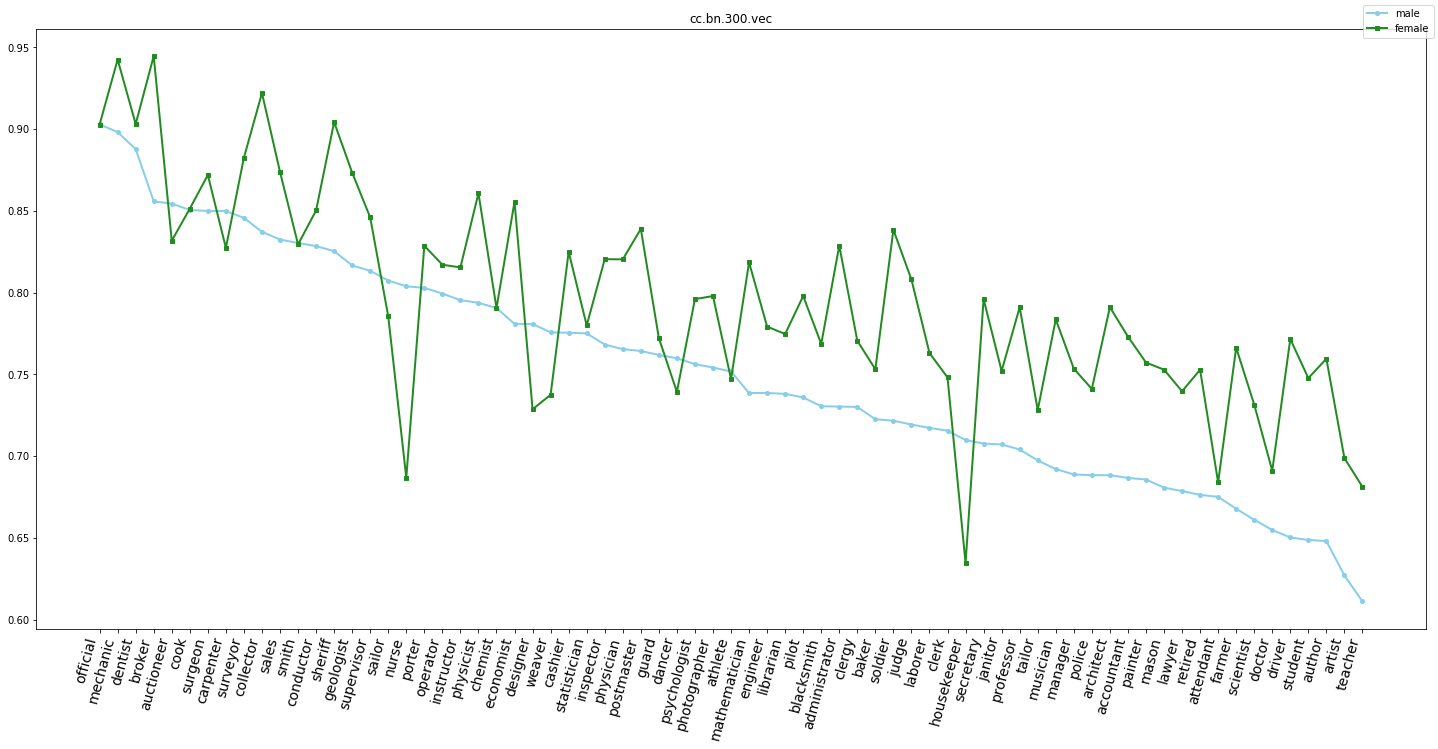

total 4 missing words for this embedding {'জুতো প্রস্তুতকারক', 'উদ্যানবিদ', 'বেলিফ', 'মিডওয়াইফ'}



target group -->
professional_occupation ['चौकीदार', 'सांख्यिकीविद्', 'दाई', 'बेलीफ', 'नीलामकर्ता', 'फोटोग्राफर', 'भूविज्ञानी', 'शोमेकर', 'एथलीट', 'कैशियर', 'डांसर', 'हाउसकीपर', 'अकाउंटेंट', 'फिजिसिस्ट', 'माली', 'डेंटिस्ट', 'जुलाहा', 'लोहार', 'मनोवैज्ञानिक', 'सुपरवाइजर', 'गणितज्ञ', 'सर्वेक्षक', 'दर्जी', 'डिजाइनर', 'अर्थशास्त्री', 'मैकेनिक', 'मजदूर', 'पोस्टमास्टर', 'दलाल', 'केमिस्ट', 'लाइब्रेरियन', 'परिचर', 'लिपिक', 'संगीतकार', 'कुली', 'वैज्ञानिक', 'बढ़ई', 'नाविक', 'प्रशिक्षक', 'शेरिफ', 'पायलट', 'निरीक्षक', 'राजमिस्त्री', 'बेकर', 'एडमिनिस्ट्रेटर', 'आर्किटेक्ट', 'कलेक्टर', 'ऑपरेटर', 'सर्जन', 'ड्राइवर', 'पेंटर', 'कंडक्टर', 'नर्स', 'कुक', 'इंजीनियर', 'सेवानिवृत्त', 'बिक्री', 'वकील', 'पादरी', 'चिकित्सक', 'किसान', 'क्लर्क', 'प्रबंधक', 'रक्षक', 'कलाकार', 'स्मिथ', 'अधिकारी', 'पुलिस', 'चिकित्सक', 'प्रोफेसर', 'छात्र', 'जज', 'शिक्षक', 'लेखक', 'सचिव', 'सैनिक']




reference group -->
male ['अंकल', 

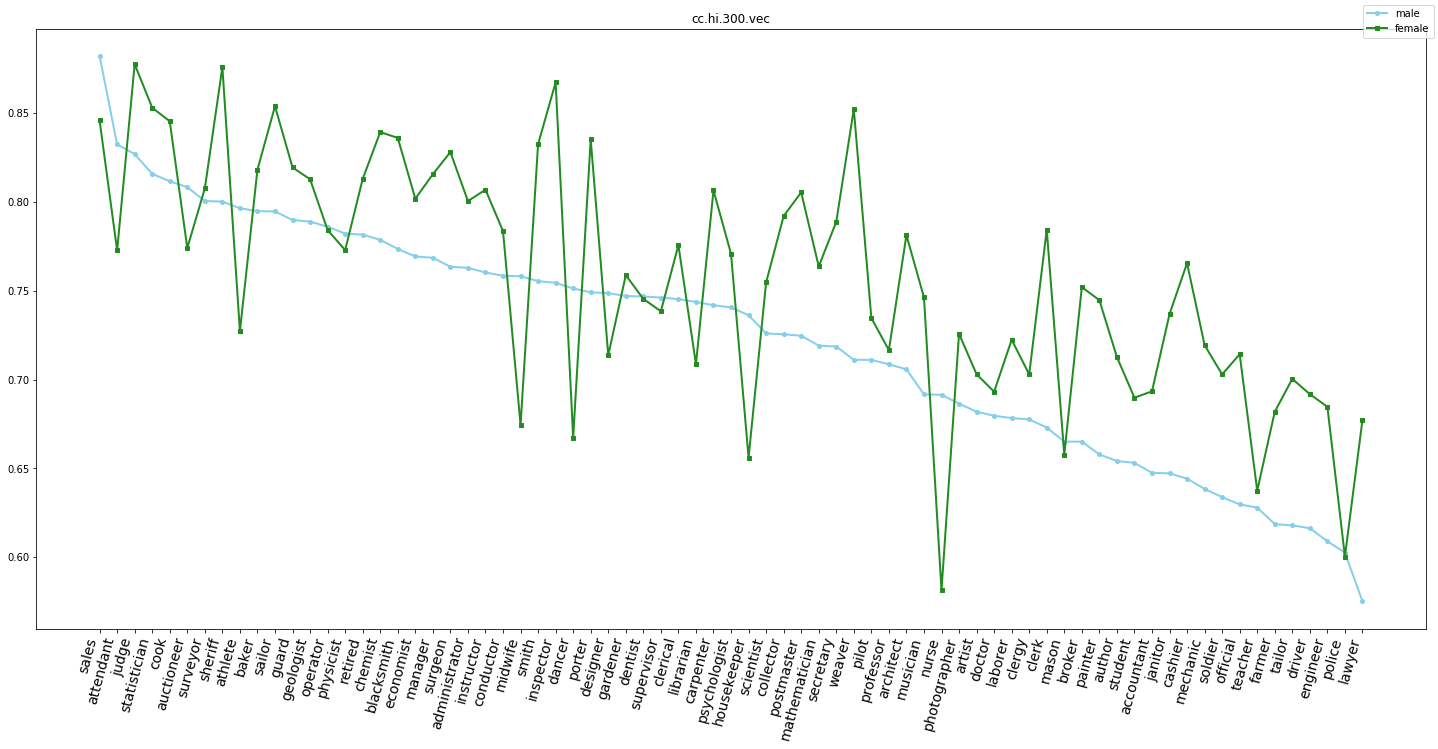

total 2 missing words for this embedding {'शोमेकर', 'बेलीफ'}



target group -->
professional_occupation ['चौकीदार', 'सांख्यिकीय', 'सुँडेनी', 'बेलिफ', 'लिलामी', 'फोटोग्राफर', 'भूविज्ञानी', 'जुत्ता निर्माता', 'खेलाडी', 'क्यासियर', 'नर्तक', 'हाउसकीपर', 'एकाउन्टेन्ट', 'भौतिक विज्ञ', 'माली', 'दंत चिकित्सक', 'जुलाहा', 'लोहार', 'मनोवैज्ञानिक', 'सुपरवाइजर', 'गणितज्ञ', 'सर्वेक्षणकर्ता', 'दर्जी', 'डिजाइनर', 'अर्थशास्त्री', 'मेकानिक', 'मजदूर', 'पोस्टमास्टर', 'दलाल', 'रसायन विज्ञ', 'लाइब्रेरियन', 'परिचर', 'लिपिक', 'संगीतकार', 'पोर्टर', 'वैज्ञानिक', 'बढ़ई', 'नाविक', 'प्रशिक्षक', 'शेरिफ', 'पायलट', 'इन्स्पेक्टर', 'मेसन', 'बेकर', 'प्रशासक', 'आर्किटेक्ट', 'कलेक्टर', 'अपरेटर', 'सर्जन', 'ड्राइभर', 'पेन्टर', 'कन्डक्टर', 'नर्स', 'कुक', 'इन्जिनियर', 'सेवानिवृत्त', 'बिक्री', 'वकिल', 'पादरीहरू', 'चिकित्सक', 'किसान', 'क्लर्क', 'म्यानेजर', 'गार्ड', 'कलाकार', 'स्मिथ', 'अफिसियल', 'पुलिस', 'चिकित्सक', 'प्राध्यापक', 'विद्यार्थी', 'न्यायाधीश', 'शिक्षक', 'लेखक', 'सचिव', 'सिपाही']




reference group -->
male ['केटा'

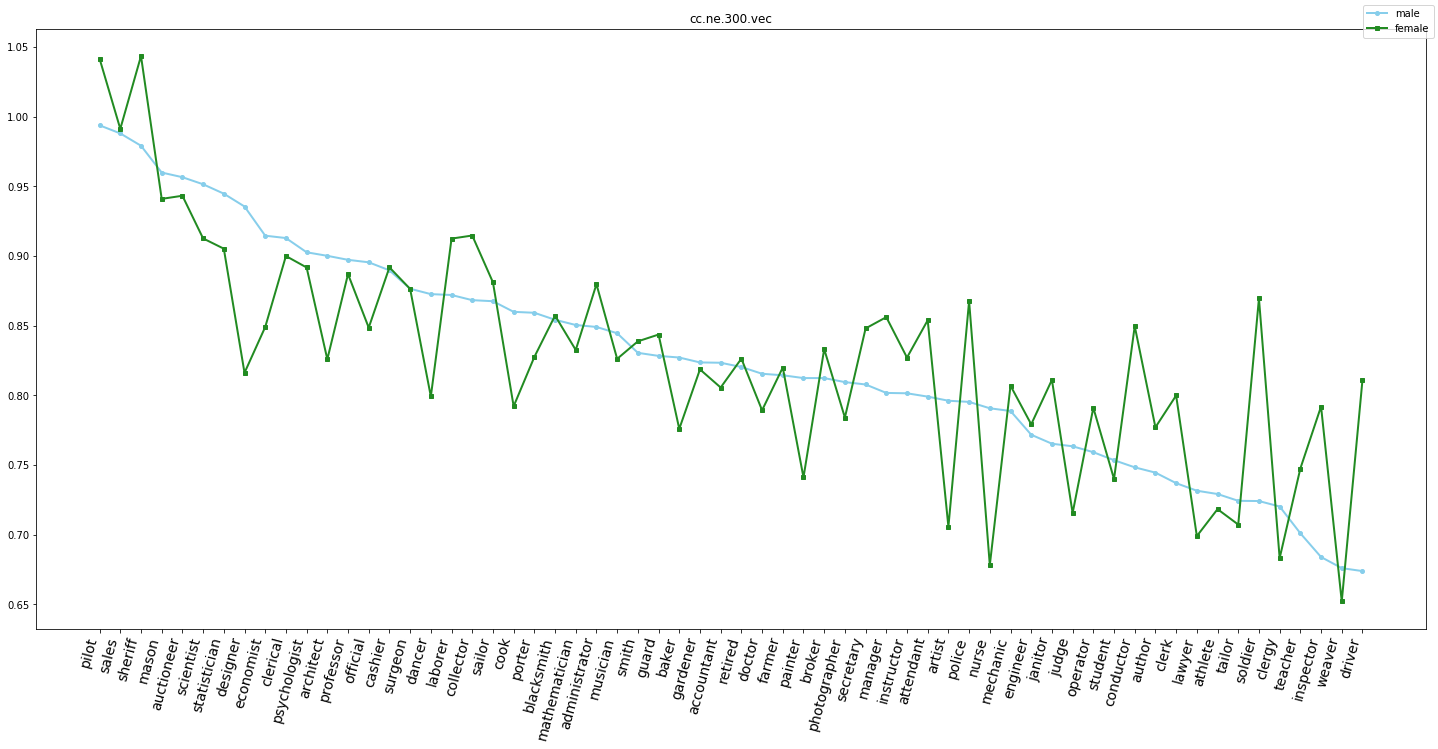

total 14 missing words for this embedding {'सर्वेक्षणकर्ता', 'बेलिफ', 'भूविज्ञानी', 'भौतिक विज्ञ', 'दंत चिकित्सक', 'रसायन विज्ञ', 'जुत्ता निर्माता', 'सुपरवाइजर', 'बढ़ई', 'लाइब्रेरियन', 'भान्जीहरू', 'हाउसकीपर', 'सुँडेनी', 'पोस्टमास्टर'}



target group -->
professional_occupation ['جینیٹر', 'شماریات دان', 'دایہ', 'بیلف', 'نیلامی', 'فوٹوگرافر', 'ماہر ارضیات', 'جوتا بنانے والا', 'ایتھلیٹ', 'کیشئیر', 'ڈانسر', 'گھریلو ملازم', 'اکاؤنٹنٹ', 'طبیعیات دان', 'مالی', 'دانتوں کا ڈاکٹر', 'ویور', 'لوہار', 'ماہر نفسیات', 'سپروائزر', 'ریاضی دان', 'سرویئر', 'درزی', 'ڈیزائنر', 'ماہر معاشیات', 'مکینک', 'مزدور', 'پوسٹ ماسٹر', 'بروکر', 'کیمسٹ', 'لائبریرین', 'حاضر خدمت', 'مولوی', 'موسیقار', 'پورٹر', 'سائنسدان', 'بڑھئی', 'نااخت', 'انسٹرکٹر', 'شیرف', 'پائلٹ', 'انسپکٹر', 'میسن', 'بیکر', 'ایڈمنسٹریٹر', 'معمار', 'کلکٹر', 'آپریٹر', 'سرجن', 'ڈرائیور', 'پینٹر', 'کنڈیکٹر', 'نرس', 'کک', 'انجینئر', 'ریٹائرڈ', 'سیلز', 'وکیل', 'پادری', 'فزیشن', 'کسان', 'کلرک', 'منیجر', 'گارڈ', 'آرٹسٹ', 'سمتھ', 'آفیشل', 'پولیس', 'ڈاکٹر', 

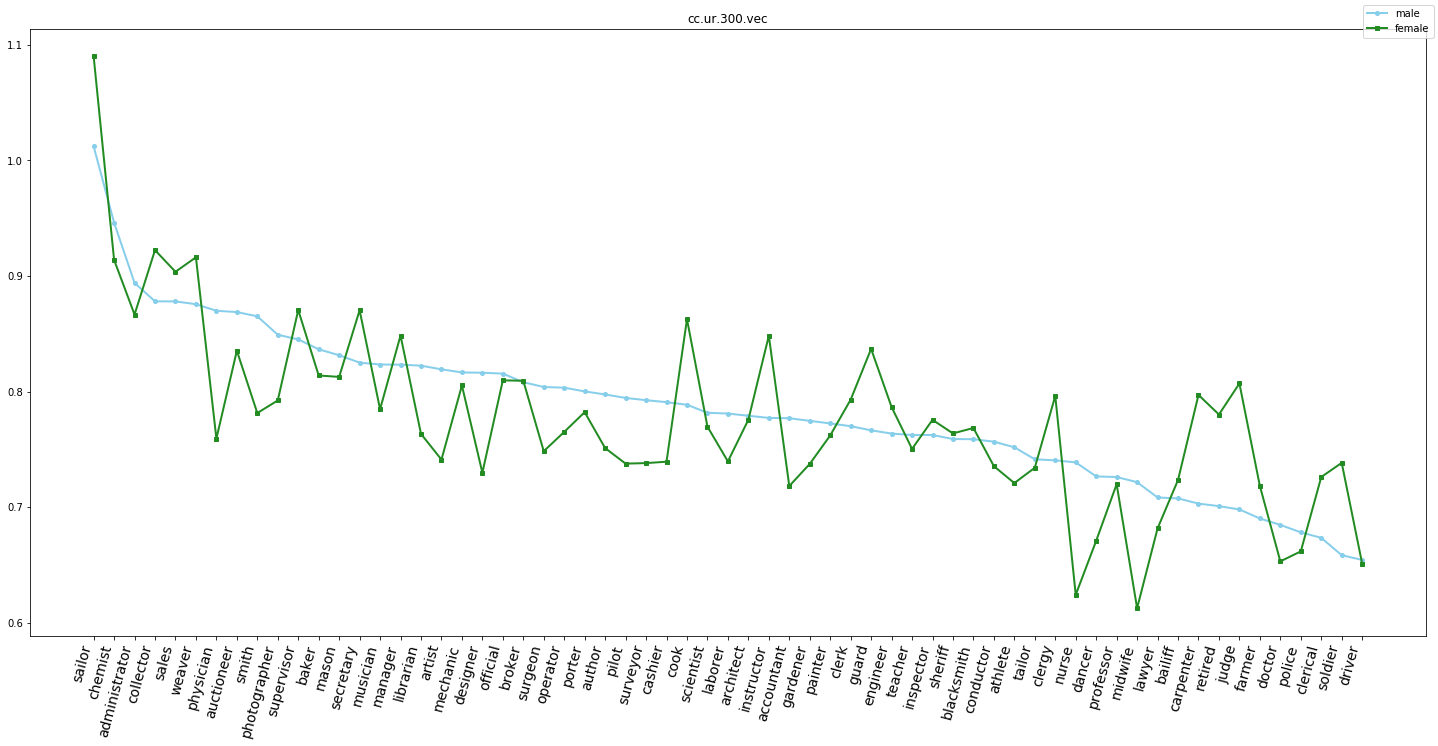

total 13 missing words for this embedding {'ماہر نفسیات', 'جوتا بنانے والا', 'حاضر خدمت', 'ریاضی دان', 'طالب علم', 'ماہر ارضیات', 'گھریلو ملازم', 'دانتوں کا ڈاکٹر', 'پوسٹ ماسٹر', 'جینیٹر', 'ماہر معاشیات', 'طبیعیات دان', 'شماریات دان'}





In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    if embedding_name[-1] == 'c':
        lang_name = embedding_name.split('.')[1]
    else:
        lang_name = embedding_name.split('.')[0]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    try:
        if embedding_name.split('.')[-1] == 'bin':
            model = KeyedVectors.load_word2vec_format(filename, binary=True)
        else:
            model = KeyedVectors.load_word2vec_format(filename, binary=False)
    except:
        continue
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)


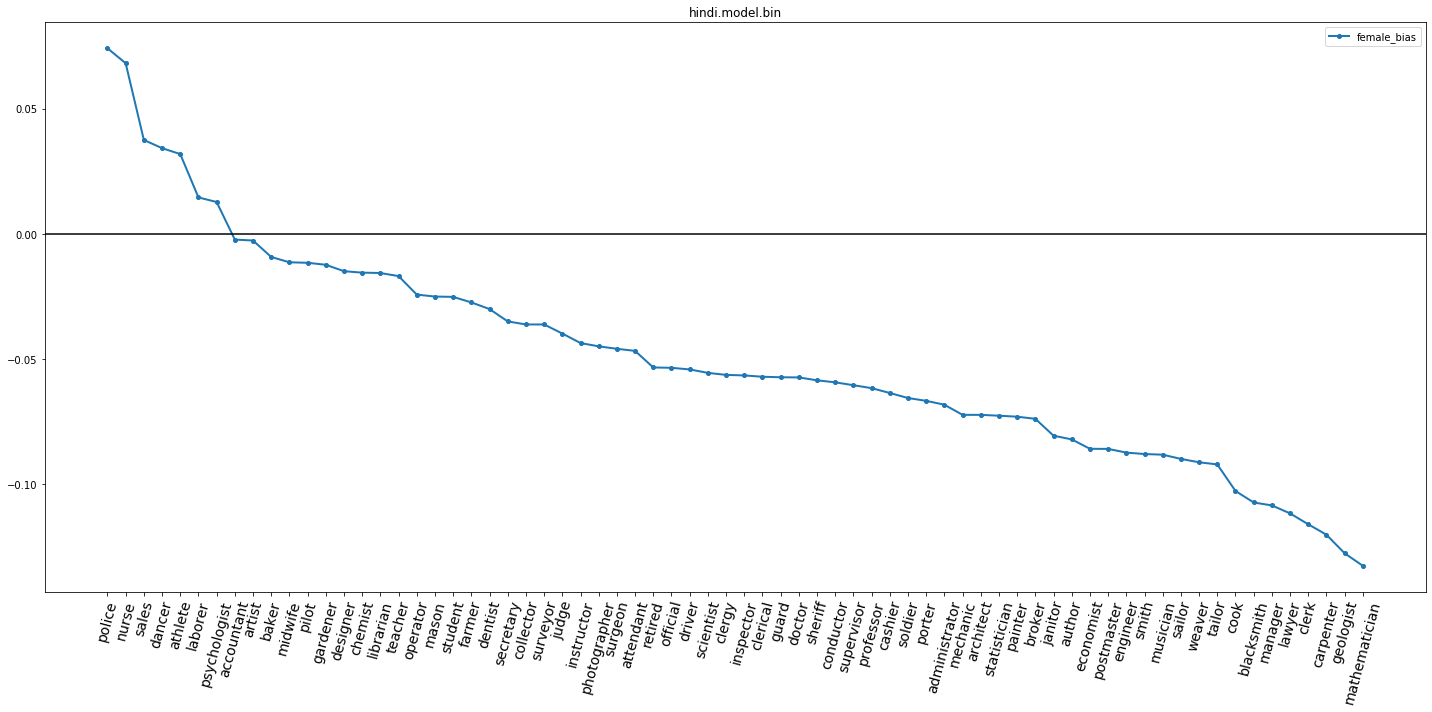

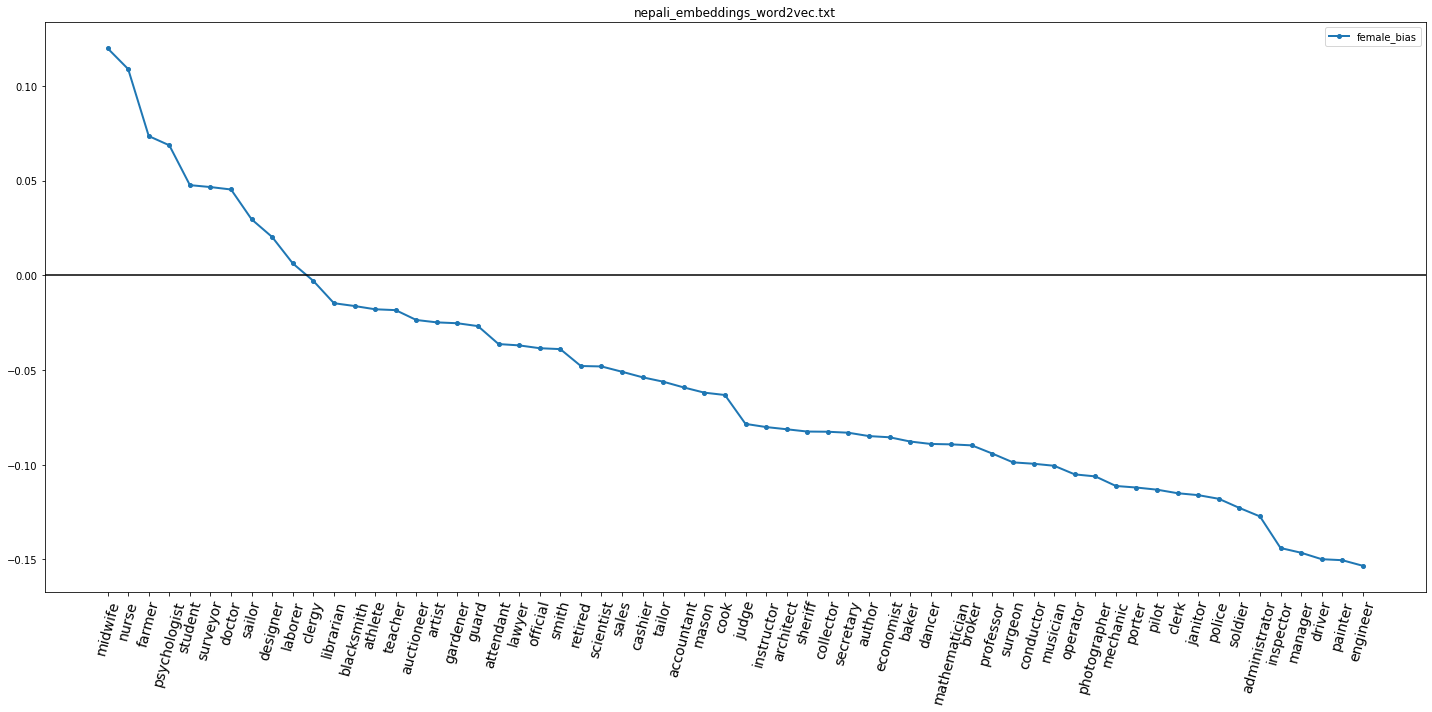

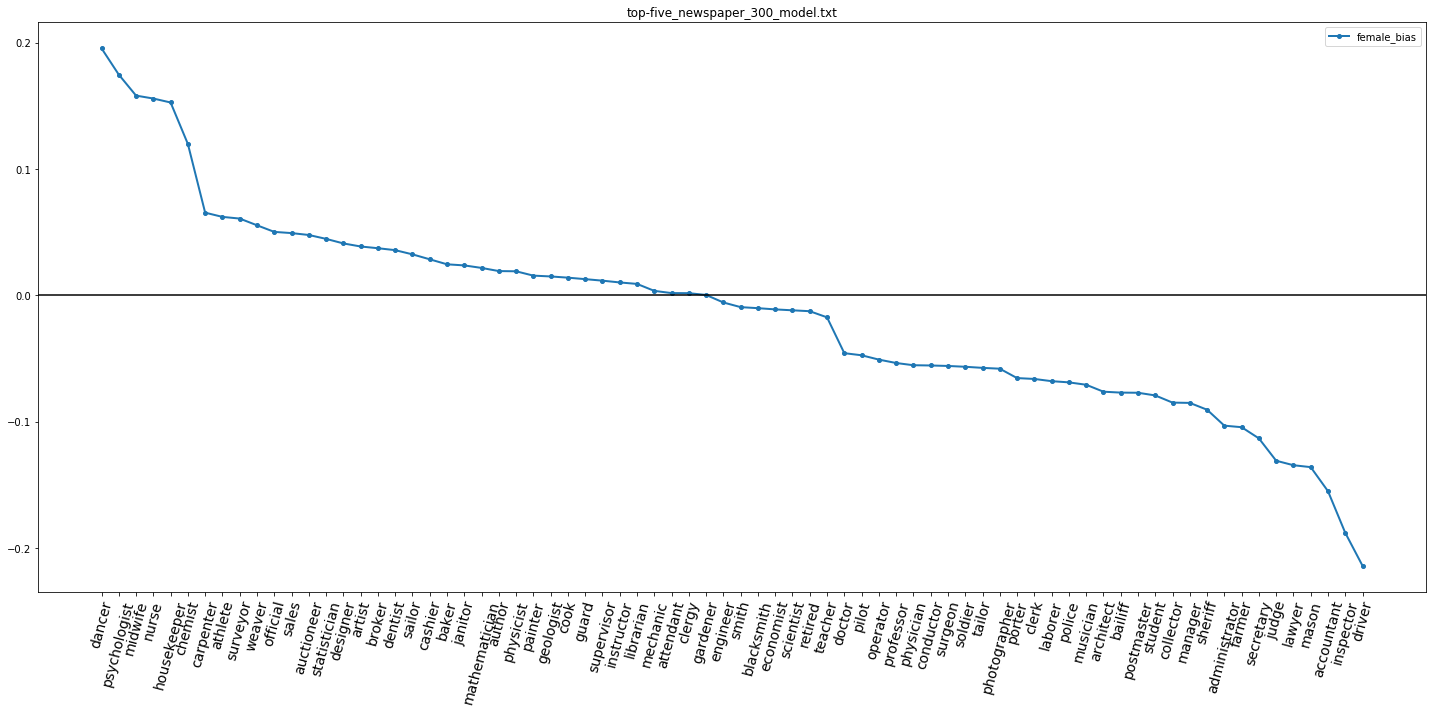

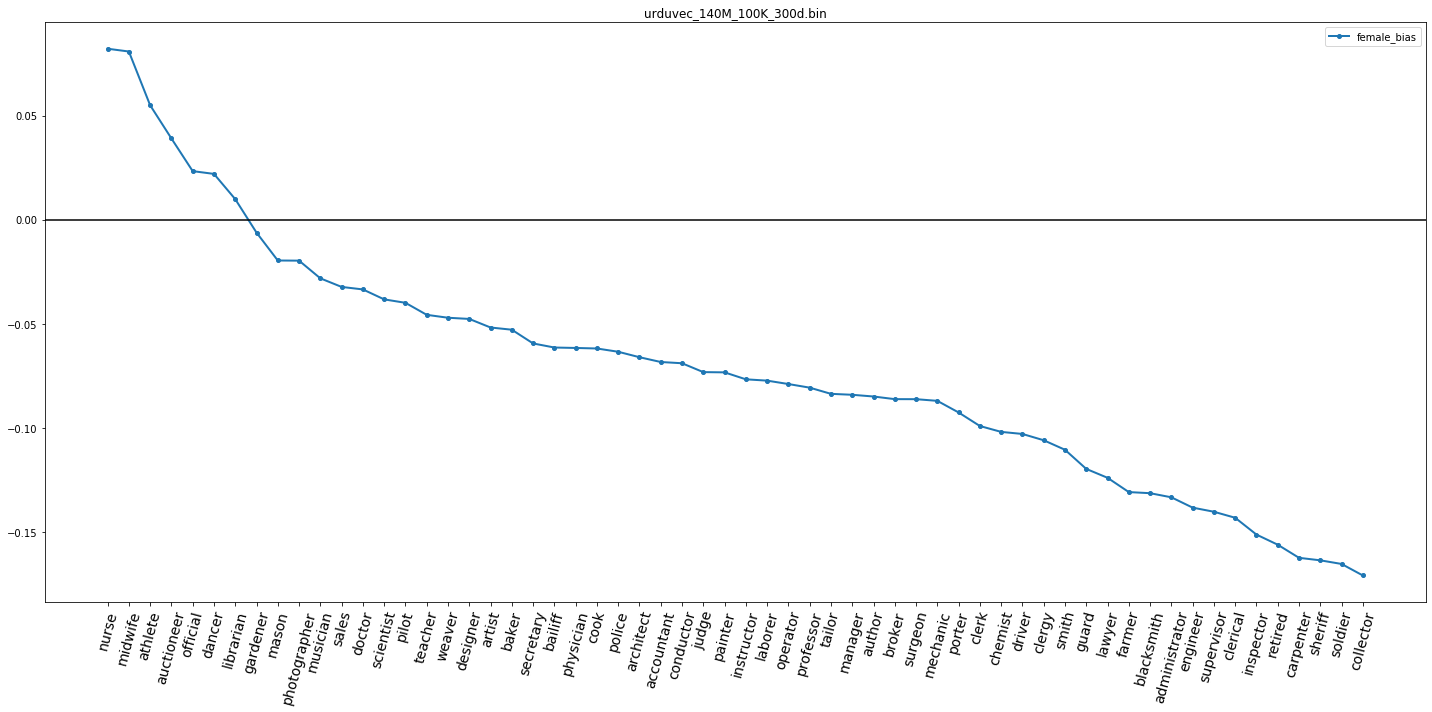

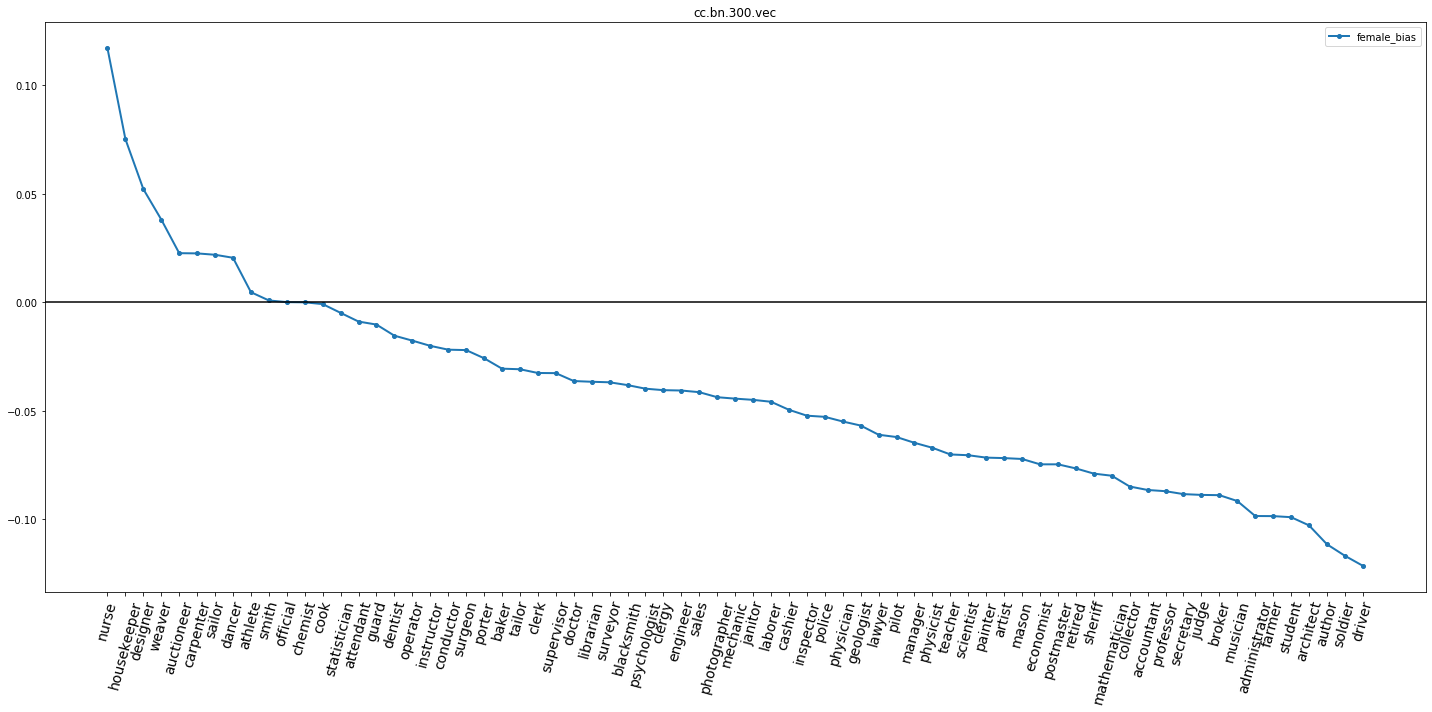

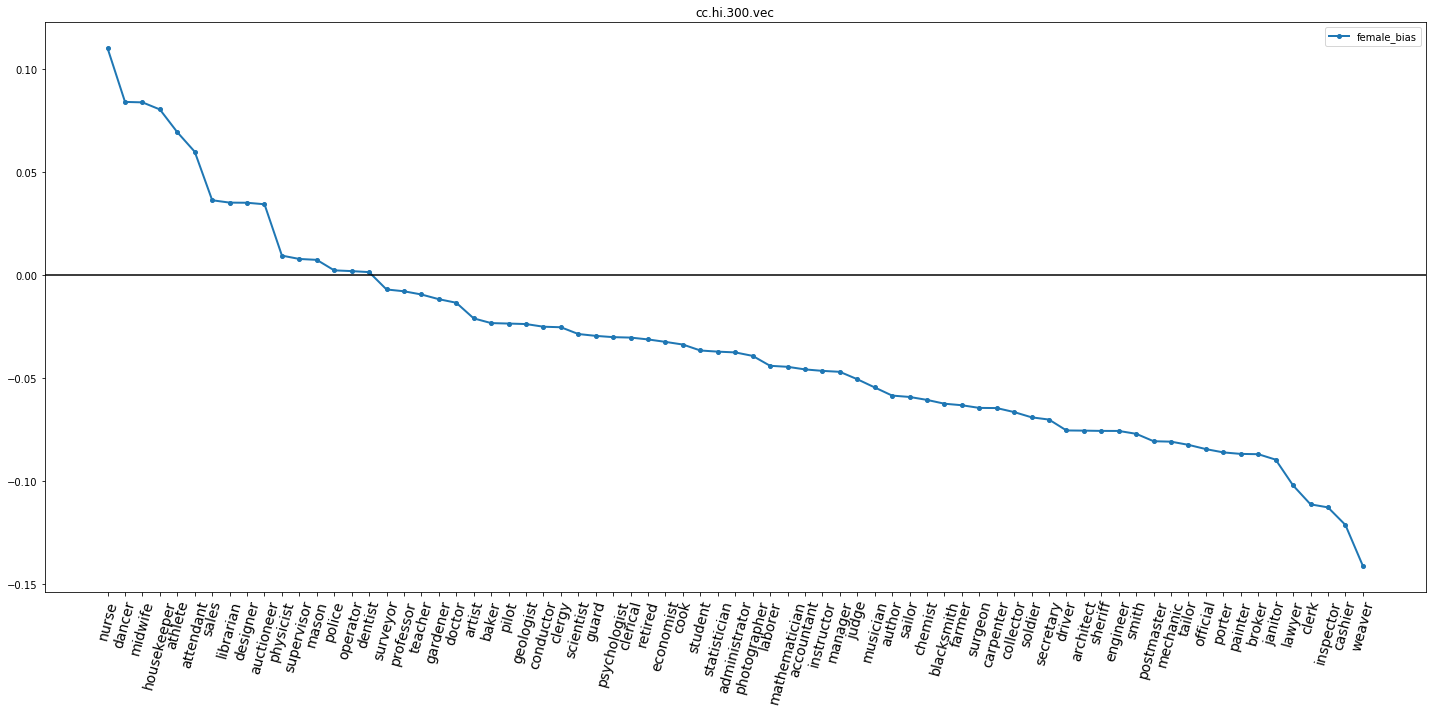

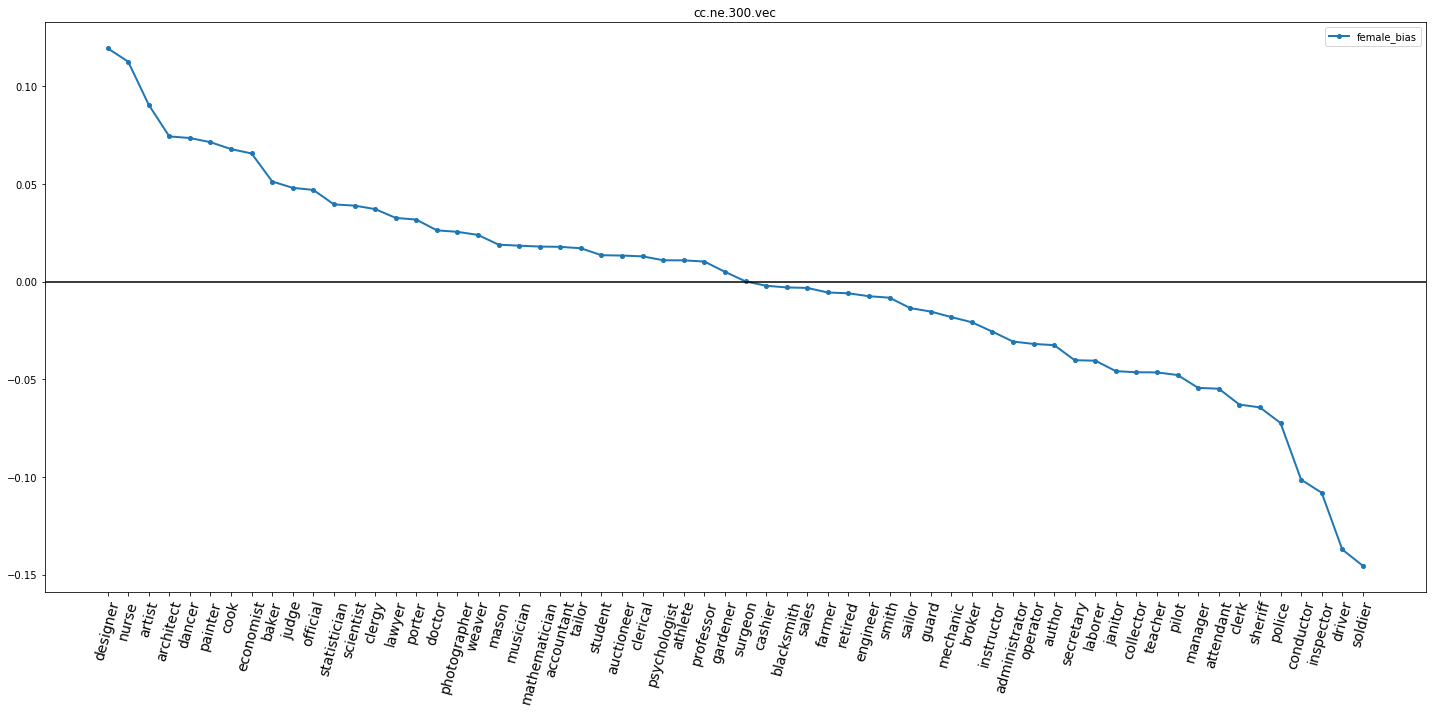

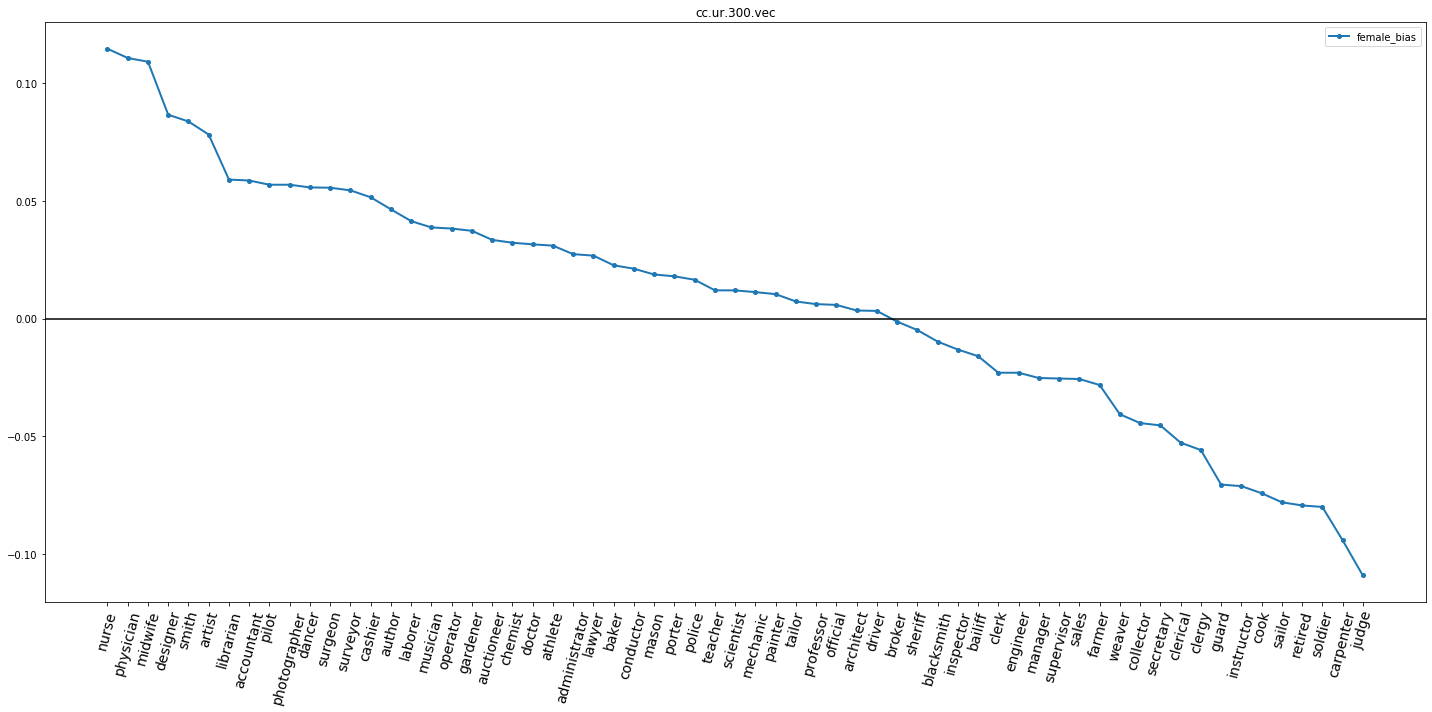

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

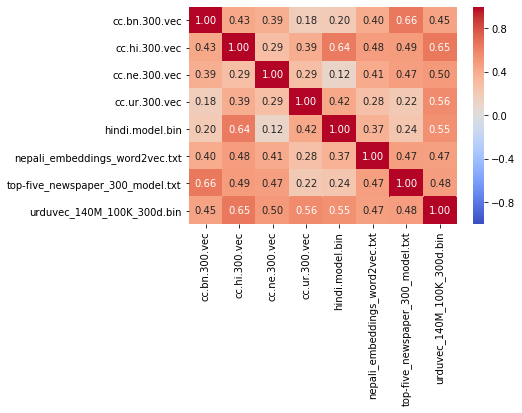

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)